# Importations and Required Libraries

In [1]:
pip install ipython-sql sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%load_ext sql
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

**Create a database connection**

In [3]:
engine = create_engine('sqlite:///flipside_data.db')  
conn = engine.connect()

In [4]:
db_file_path = r"C:\Users\user\Downloads\flipside_data (1).db"
conn = sqlite3.connect(db_file_path)

# EDA

**Querying the tables to inspect the data**

In [5]:
query = """SELECT * 
        FROM flipside_days_active;
        """
#preview the first five rows
df_fda = pd.read_sql_query(query, conn)
df_fda.head()

,ADDRESS,FIRST_TX_DATE,FIRST_PROGRAM_ID,LAST_TX_DATE,LAST_PROGRAM_ID,NUM_DAYS_ACTIVE,NUM_TXS,TOTAL_FEES,PROGRAMS_USED
0,9P65j1MLdkve3iShPXF3H6F32qGhKYmVLyza5J4ZvkyU,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ,1.0,1.0,NaN,"[""11111111111111111111111111111111"",""111111111..."
1,6VvDGnnAeEeK3yd4jAdH5X7ZdRVTsrbrg4beDZvQemmG,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,1.0,1.0,NaN,"[""11111111111111111111111111111111"",""111111111..."
2,gGf97pe7apxKNmQyiBctckiLeuPTBrbh4HridK6bNBz,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,1.0,1.0,NaN,"[""11111111111111111111111111111111"",""111111111..."
3,7VEETqsSS9QdhZZg2fZcpivzLYg8zbQrKEzpFoN9zpav,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,1.0,1.0,NaN,"[""11111111111111111111111111111111"",""111111111..."
4,ESJkFSHeeHE4rBHKxVAKA4QxjL93KPH7MbWrwkyDQgQx,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,1.0,2.0,10000.0,"[""11111111111111111111111111111111"",""675kPX9MH..."


In [6]:
query = """SELECT * 
        FROM flipside_dim_labels;
        """
#preview the first five rows
df_fdl = pd.read_sql_query(query, conn)
df_fdl.head()

,BLOCKCHAIN,CREATOR,ADDRESS,LABEL_TYPE,LABEL_SUBTYPE,ADDRESS_NAME
0,solana,flipside,9w9KYFGNFGPoKnp3yUqVEVbx2kkNMcAgK63KKgGXowFw,nft,nf_token_contract,None
1,solana,flipside,EDrB6V2ikQ1naeYoN9uWRQ5ZbNV3uY3DbeDxMVo7St2t,nft,nf_token_contract,None
2,solana,flipside,2hr8qb1meWj77M2HZAz4AeA78NmXeZq97UWqbtc58da4,nft,nf_token_contract,None
3,solana,flipside,2A7EPL3eAN3ecakYdyfyoTKGgVyLGFvDFjAprKWuUHvm,nft,nf_token_contract,None
4,solana,flipside,3Lgs24755tNxfkNa82JJ382cRp8uGy3hYsV2sLyj5L8M,nft,nf_token_contract,None


In [7]:
query = """SELECT * 
        FROM Solana_Weekly_New_Users;
        """
#preview the first five rows
df_swnu = pd.read_sql_query(query, conn)
df_swnu.head()

,WEEK,NEW_USERS
0,2025-03-03 00:00:00.000,3.0
1,2025-02-03 00:00:00.000,1.0
2,2025-01-20 00:00:00.000,1.0
3,2025-01-13 00:00:00.000,2.0
4,2025-01-06 00:00:00.000,2.0


In [8]:
query = """SELECT * 
        FROM Solana_last_use_data;
        """
#preview the first five rows
df_slud = pd.read_sql_query(query, conn)
df_slud.head()

,ADDRESS,LAST_USE
0,GtYVsyLCGKx29cZtTfvtdcZ3rwamYKan4FpZ286Yg5A,2025-03-17 00:00:00.000
1,HPPWqvpsU7PAzunxQW4gmNiPJDiuzdLodogKAz58sUmd,2025-03-17 00:00:00.000
2,BcqQYWEhqE3Qo3RRMF72Dsc7t65Tm7zSEd98EgHXb4oz,2025-03-17 00:00:00.000
3,DJo8CG7sJd7dW23Dk6NJvRFZNfMUoioaLxqQ9V554jSD,2025-03-17 00:00:00.000
4,AGkfxH1QfxxbwZSNuWe1pwCp6yBkRz8TNbKmSUZrQvWz,2025-03-17 00:00:00.000


In [9]:
query = """SELECT * 
        FROM Solana_Weekly_Unique_Programs;
        """
#preview the first five rows
df_swup = pd.read_sql_query(query, conn)
df_swup.head()

,WEEK,UNIQUE_PROGRAMS
0,2025-03-17 00:00:00.000,420.0
1,2025-03-10 00:00:00.000,789.0
2,2025-03-03 00:00:00.000,777.0
3,2025-02-24 00:00:00.000,802.0
4,2025-02-17 00:00:00.000,805.0


In [10]:
query = """SELECT * 
        FROM Solana_Weekly_Unique_Users;
        """
#preview the first five rows
df_swuu = pd.read_sql_query(query, conn)
df_swuu.head()

,WEEK,UNIQUE_USERS
0,2025-03-17 00:00:00.000,52541.0
1,2025-03-10 00:00:00.000,52514.0
2,2025-03-03 00:00:00.000,75160.0
3,2025-02-24 00:00:00.000,86657.0
4,2025-02-17 00:00:00.000,70685.0


**Identify missing values and remove them**

In [11]:
df_fda_cleaned = df_fda.dropna()

df_fdl_cleaned = df_fdl.dropna()

df_swnu_cleaned = df_swnu.dropna()

df_slud_cleaned = df_slud.dropna()

df_swup_cleaned = df_swup.dropna()

df_swuu_cleaned = df_swuu.dropna()

In [12]:
# Display the cleaned dataset
df_fda_cleaned.tail()

,ADDRESS,FIRST_TX_DATE,FIRST_PROGRAM_ID,LAST_TX_DATE,LAST_PROGRAM_ID,NUM_DAYS_ACTIVE,NUM_TXS,TOTAL_FEES,PROGRAMS_USED
99993,FqB8TXT9ajEqAKbowe5iENGosqgN72q3FXuoPzMYsFay,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,11111111111111111111111111111111,1.0,1.0,10000.0,"[""11111111111111111111111111111111"",""675kPX9MH..."
99995,AvwXWaLwc9xP1RXgy7EGGctTgLZvFegUqNaLBdq26DmB,2024-03-20 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,STAKEkKzbdeKkqzKpLkNQD3SUuLgshDKCD7U8duxAbB,16.0,31.0,3857350.0,"[""JUP6LkbZbjS1jKKwapdHNy74zcZ3tLUZoi5QNyVTaV4""..."
99997,7EHyYjXtqfepRdstb8HZghz2yRHVCE5v7jTFbcqwConi,2025-03-11 00:00:00.000,routeUGWgWzqBWFcrCfv8tritsqukccJPu3q5GPP3xS,2025-03-11 00:00:00.000,11111111111111111111111111111111,1.0,2.0,10000.0,"[""11111111111111111111111111111111"",""routeUGWg..."
99998,3692PsUoikuixzWTHgg7CW43ANLsJH6FpuRU9zwkgaMX,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,11111111111111111111111111111111,1.0,4.0,95000.0,"[""11111111111111111111111111111111"",""6EF8rrect..."
99999,Ds9ce5uN4tGEMdMPw7jVFzrJLK71anR2kCMM79p8NuU3,2024-10-31 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,2025-03-11 00:00:00.000,11111111111111111111111111111111,83.0,705.0,5402535.0,"[""675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8..."


**Check and eliminate duplicates**

In [13]:
df_fda_no_duplicates = df_fda_cleaned.drop_duplicates()

df_fdl_no_duplicates = df_fdl_cleaned.drop_duplicates()

df_swnu_no_duplicates = df_swnu_cleaned.drop_duplicates()

df_slud_no_duplicates = df_slud_cleaned.drop_duplicates()

df_swup_no_duplicates = df_swup_cleaned.drop_duplicates()

df_swuu_no_duplicates = df_swuu_cleaned.drop_duplicates()

In [14]:
# Display the datasets without duplicates
df_fda_no_duplicates.head()

,ADDRESS,FIRST_TX_DATE,FIRST_PROGRAM_ID,LAST_TX_DATE,LAST_PROGRAM_ID,NUM_DAYS_ACTIVE,NUM_TXS,TOTAL_FEES,PROGRAMS_USED
4,ESJkFSHeeHE4rBHKxVAKA4QxjL93KPH7MbWrwkyDQgQx,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,1.0,2.0,10000.0,"[""11111111111111111111111111111111"",""675kPX9MH..."
5,87K4yCHQwb7AjCkK6cAwM8BbtfrEGBQmFYu2Sw9rT5He,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,11111111111111111111111111111111,1.0,1.0,10000.0,"[""11111111111111111111111111111111"",""675kPX9MH..."
6,4UM1urrc1hjCpkZmpV9bYR3ZUpWdYL4n5Eb9mGNyYKDN,2025-03-11 00:00:00.000,11111111111111111111111111111111,2025-03-11 00:00:00.000,11111111111111111111111111111111,1.0,90.0,435000.0,"[""11111111111111111111111111111111"",""675kPX9MH..."
7,2JPbX3wyHBfcecyTtBA4LtfiRdUNY6JdKvWisqbCL7oN,2021-12-21 00:00:00.000,cndyAnrLdpjq1Ssp1z8xxDsB8dxe7u4HL5Nxi2K5WXZ,2025-03-11 00:00:00.000,JUP6LkbZbjS1jKKwapdHNy74zcZ3tLUZoi5QNyVTaV4,102.0,257.0,37126972.0,"[""JUP6LkbZbjS1jKKwapdHNy74zcZ3tLUZoi5QNyVTaV4""..."
8,2onqANa49DWz2WbCPK4vdVeNU9oHpFGeSiPFSWpdENxq,2024-01-30 00:00:00.000,ENicYBBNZQ91toN7ggmTxnDGZW14uv9UkumN7XBGeYJ4,2025-03-11 00:00:00.000,11111111111111111111111111111111,7.0,21.0,8351643.0,"[""endoLNCKTqDn8gSVnN2hDdpgACUPWHZTwoYnnMybpAT""..."


 **Total `UNIQUE_PROGRAMS` executed during the year 2024.**


In [63]:
query = """
SELECT SUM(UNIQUE_PROGRAMS)
FROM Solana_Weekly_Unique_Programs
WHERE WEEK BETWEEN '2024-01-01' AND '2024-12-31';
"""
result = pd.read_sql_query(query, conn)

total_unique_programs = result.iloc[0, 0]
print(f"Total Unique Programs on the Solana Blockchain for 2024 was: {total_unique_programs}")

Total Unique Programs on the Solana Blockchain for 2024 was: 33714.0


**Weekly analysis of new users on the Solana blockchain based on a dataset containing two columns: `WEEK` and `NEW_USERS`.**

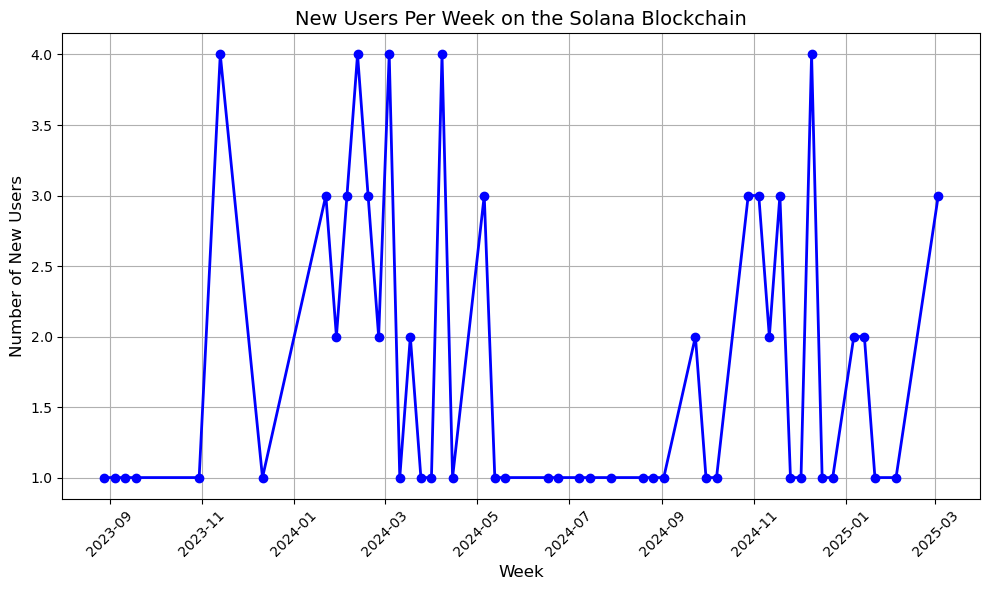

In [69]:
#convert 'WEEK' column to string 
if df_swnu['WEEK'].dtype != 'object':
    df_swnu['WEEK'] = df_swnu['WEEK'].astype(str)

#clean the 'WEEK' column for any unwanted invisible characters
df_swnu['WEEK'] = df_swnu['WEEK'].str.strip()

#convert the 'WEEK' column to datetime
df_swnu['WEEK'] = pd.to_datetime(df_swnu['WEEK'], errors='coerce')

#Group by the 'WEEK' column and sum the 'NEW_USERS' column
df_weekly_new_users = df_swnu.groupby('WEEK')['NEW_USERS'].sum().reset_index()

#Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(df_weekly_new_users['WEEK'], df_weekly_new_users['NEW_USERS'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('New Users Per Week on the Solana Blockchain', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of New Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

**The time series plot shows the trend of new users joining the Solana blockchain each week.**
**This allows for easy identification of growth patterns, trends, and potential anomalies.**

# Merging Datasets